# Spectral Representation Method
Author: Lohit Vandanapu
Date: August 20, 2018
Last Modified: May 09, 2019

In this example, the Spectral Representation Method is used to generate stochastic processes from a prescribed Power Spectrum. This example illustrates how to use the SRM class for a one dimensional and one variable case and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the SRM class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [2]:
n_sim = 10000  # Num of samples

n = 1 # Num of dimensions

m = 1 # Num of variables

T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.

# # Generation of Input Data(Stationary)
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)

Make sure that the input parameters are in order to prevent aliasing

In [3]:
t_u = 2*np.pi/2/F

if dt>t_u:
    print('Error')

Defining the Power Spectral Density Function

In [4]:
S = 125 / 4 * w ** 2 * np.exp(-5 * w)

In [5]:
SRM_object = SRM(n_sim, S, dt, dw, nt, nw, verbose=True)
samples = SRM_object.samples

UQpy: Stochastic Process: Running Spectral Representation Method.
UQpy: Stochastic Process: Starting simulation of uni-variate Stochastic Processes.
UQpy: The number of dimensions is : 1
UQpy: Stochastic Process: Spectral Representation Method Complete.


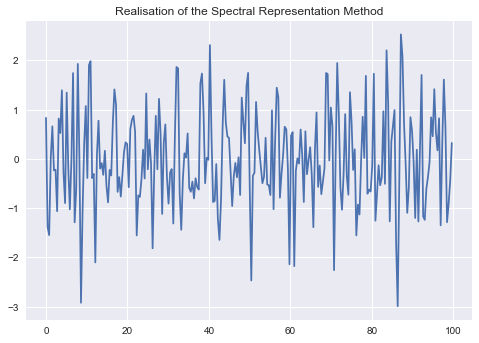

In [6]:
fig, ax = plt.subplots()
plt.title('Realisation of the Spectral Representation Method')
plt.plot(t, samples[0, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [7]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is ', np.sum(S)*dw*2)

The mean of the samples is  4.3519875203568146e-20 whereas the expected mean is 0.000
The variance of the samples is  0.9528201660239447 whereas the expected variance is  0.9528201660239434
